# Load Library

In [127]:
from Bio import SeqIO
from pandas import DataFrame
import pandas as pd
import os, sys
from tqdm import tqdm_notebook
import zipfile

# Load Functions

In [128]:
def BGC_counter(refseq):
    gbk_file = refseq
    print (gbk_file)
    df_antismash = DataFrame(columns=("Cluster No","Cluster Type"))
    for seq_record in SeqIO.parse(gbk_file, "genbank"):
        for seq_feat in seq_record.features:
            if seq_feat.type == "cluster":
                cluster_number = seq_feat.qualifiers["note"][0].replace(" ","_").replace(":","")
                cluster_type = seq_feat.qualifiers["product"][0]
                df = pd.DataFrame([[cluster_number, cluster_type]], columns=("Cluster No", "Cluster Type"))
                df_antismash = df_antismash.append(df, ignore_index=True)
    return df_antismash

# Automate analysis

In [131]:
os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
cwd = os.getcwd()
id = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(id))):    
    try:
        genus = id.loc[i, "Genus"]
        species = id.loc[i, "Species"]
        refseq = pd.read_csv('Refseq_'+genus+'_'+species+'.csv')
        os.chdir(cwd+"/Result/"+genus+" "+species)
        #_______________________________________________________
        cwd2 = (os.getcwd())
        result = os.listdir()
        for x in tqdm_notebook(range(len(result))):
            if '.zip' in result[x]:
                print(result[x])
                with zipfile.ZipFile(result[x]) as zip_ref:
                    zip_ref.extractall()
        for z in range(len(result)):
            if 'bacteria' in result[z]:
                #print (result[z])
                os.chdir(result[z]+"/")
                #___________________________________________________
                #print(os.getcwd())
                dir_ref = os.listdir()
                #print(dir_ref)
                for y in range(len(dir_ref)):
                    #print (dir_ref[y])
                    if 'final.gbk' in dir_ref[y]:
                        df = BGC_counter(dir_ref[y])
                        #print(df)
                        os.chdir(cwd2)
                        #____________________________________________
                        df.to_csv("BGC_count_"+dir_ref[y].replace('.final.gbk','')+".csv")
                        #print(os.getcwd())
                        print('_____________________________________________')
                os.chdir(cwd2)
                print(os.getcwd())
            os.chdir(cwd2)
        os.chdir(cwd)
    except OSError:
        print('ERROR_'+genus+' '+species)
        os.chdir(cwd)
        #pass

NC_006085.1.zip
NC_014039.1.zip
NC_016511.1.zip
NC_016512.1.zip
NC_016516.1.zip
NC_017534.1.zip
NC_017535.1.zip
NC_017550.1.zip
NC_018707.1.zip
NC_021085.1.zip
NZ_CP006032.1.zip
NZ_CP012351.1.zip
NZ_CP012352.1.zip
NZ_CP012354.1.zip
NZ_CP012355.1.zip
NZ_CP012647.1.zip
NZ_CP023676.1.zip
NZ_CP031442.1.zip
NC_017534.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NZ_CP012355.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_017535.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_018707.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NZ_CP012647.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping

NC_002976.3.zip
NC_004461.1.zip
NZ_CP009046.1.zip
NZ_CP013943.1.zip
NZ_CP014119.1.zip
NZ_CP014132.1.zip
NZ_CP020463.1.zip
NZ_CP022247.1 (1).zip
NZ_CP022247.1.zip
NZ_CP030246.1.zip
NZ_HG813242.1.zip
NZ_LT571449.1.zip
NZ_CP020463.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_CP014132.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_CP030246.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NC_004461.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_CP014119.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NC_002976.3.fina

NZ_AP014956.1.zip
NZ_CP007601.1.zip
NZ_CP023966.1.zip
NZ_AP014956.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis
NZ_CP023966.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis
NZ_CP007601.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis


NZ_CP014634.1.zip
NZ_CP014635.1.zip
NZ_CP014634.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium simulans
NZ_CP014635.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium simulans


NC_013853.1.zip
NZ_CP012646.1.zip
NZ_CP014326.1.zip
NC_013853.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Streptococcus mitis
NZ_CP014326.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Streptococcus mitis
NZ_CP012646.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Streptococcus mitis


NZ_CP014107.1.zip
NZ_CP020618.1.zip
NZ_LT963438.1.zip
NZ_LT963442.1.zip
NZ_LT963442.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis
NZ_CP020618.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis
NZ_CP014107.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis
NZ_LT963438.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis


NC_012590.1.zip
NC_012590.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium aurimucosum


NC_012704.1.zip
NC_012704.1.final.gbk
_____________________________________________
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium kroppenstedtii
ERROR_Corynebacterium amycolatum


# Count BGC

In [47]:
os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
df_count = DataFrame(columns=("Species", "Strain"))

In [132]:
df_count = DataFrame(columns=("Species", "Strain"))
cwd = os.getcwd()
species = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(species))):
    try:
        refseq = pd.read_csv('Refseq_'+species.loc[i,"Genus"]+'_'+species.loc[i,"Species"]+'.csv')
        #print(refseq)
        os.chdir(cwd+"/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        print(os.getcwd())
        result = os.listdir()
        for x in range(len(result)):
            if 'BGC_count_' in result[x]:
                print(result[x])
                df = pd.read_csv(result[x])
                df2 = df["Cluster Type"].value_counts()
                acc = result[x]
                acc = acc.replace("BGC_count_","")
                acc = acc.replace(".csv","")
                strain = refseq.loc[refseq["Refseq"] == acc, "Strain"]
                df2 = df2.rename(acc)
                df_count = df_count.append(df2)
                df_count.loc[acc, "Species"] = species.loc[i,"Genus"]+" "+species.loc[i,"Species"]
                try:
                    df_count.loc[acc, "Strain"] = strain.values[0]
                except IndexError:
                    #pass
                    print('error1')
                c = df_count.reset_index()
        os.chdir(cwd)
        #else:
            #os.chdir(cwd)
    except OSError:  
        #os.chdir(cwd)
        print('error2')
        pass

E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
BGC_count_NC_006085.1.csv
BGC_count_NC_014039.1.csv
BGC_count_NC_016511.1.csv
BGC_count_NC_016512.1.csv
BGC_count_NC_016516.1.csv
BGC_count_NC_017534.1.csv
BGC_count_NC_017535.1.csv
BGC_count_NC_017550.1.csv
BGC_count_NC_018707.1.csv
BGC_count_NC_021085.1.csv
BGC_count_NZ_CP006032.1.csv
BGC_count_NZ_CP012355.1.csv
BGC_count_NZ_CP012647.1.csv
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
BGC_count_NC_002976.3.csv
BGC_count_NC_004461.1.csv
BGC_count_NZ_CP009046.1.csv
BGC_count_NZ_CP013943.1.csv
BGC_count_NZ_CP014119.1.csv
BGC_count_NZ_CP014132.1.csv
BGC_count_NZ_CP020463.1.csv
BGC_count_NZ_CP022247.1.csv
BGC_count_NZ_CP030246.1.csv
BGC_count_NZ_HG813242.1.csv
BGC_count_NZ_LT571449.1.csv
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium tuberculostearicum
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis
BGC_count_NZ_AP0149

In [133]:
c = c.fillna(0)
c.to_csv("03_BGC_Result.csv")
c

,index,Species,Strain,bacteriocin,nrps,thiopeptide,ladderane,siderophore,lantipeptide,terpene,other,t1pks,bacteriocin-lantipeptide,lassopeptide
0,NC_006085.1,Cutibacterium acnes,KPA171202,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NC_014039.1,Cutibacterium acnes,SK137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NC_016511.1,Cutibacterium acnes,P.acn31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NC_016512.1,Cutibacterium acnes,P.acn17,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NC_016516.1,Cutibacterium acnes,P.acn33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NC_017534.1,Cutibacterium acnes,266,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NC_017535.1,Cutibacterium acnes,6609,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NC_017550.1,Cutibacterium acnes,ATCC 11828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NC_018707.1,Cutibacterium acnes,C1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NC_021085.1,Cutibacterium acnes,HL096PA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
import seaborn as sns; sns.set()
import numpy as np

df3 = c.drop(columns=["index", "Strain"])
df3 = df3.set_index('Species')
df3

,bacteriocin,nrps,thiopeptide,ladderane,siderophore,lantipeptide,terpene,other,t1pks,bacteriocin-lantipeptide,lassopeptide
Species,,,,,,,,,,,
Cutibacterium acnes,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5,16,'Biosynthetic Gene Clusters')

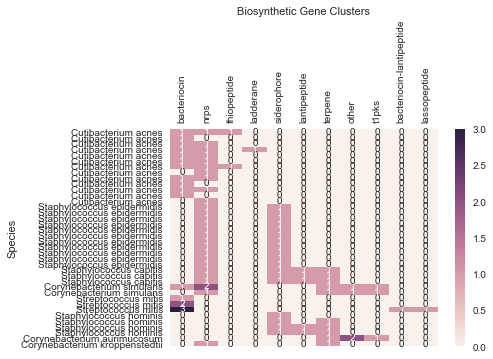

In [137]:
%matplotlib inline
g = sns.heatmap(df3, annot=True, cbar_kws={"orientation":"vertical"})
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.xaxis.set_ticks_position('top')
g.xaxis.set_label_position('top')
g.set_xlabel('Biosynthetic Gene Clusters')

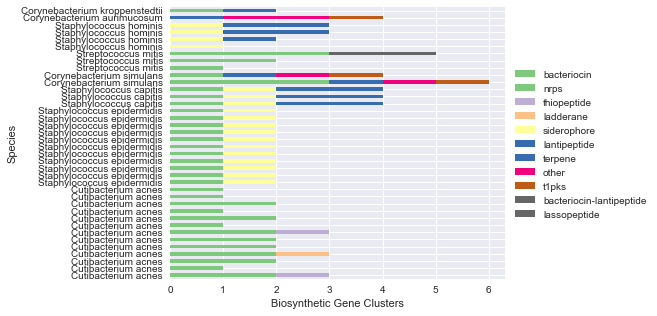

In [138]:
ax = df3.plot(kind='barh', stacked=True, legend=False, figsize=(10,5), colormap="Accent")
ax.set_xlabel("Biosynthetic Gene Clusters")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

In [139]:
df4 = df3.groupby(level=0).mean()
df4

,bacteriocin,nrps,thiopeptide,ladderane,siderophore,lantipeptide,terpene,other,t1pks,bacteriocin-lantipeptide,lassopeptide
Species,,,,,,,,,,,
Corynebacterium aurimucosum,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00,2.0,1.0,0.000000,0.000000
Corynebacterium kroppenstedtii,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.00,0.0,0.0,0.000000,0.000000
Corynebacterium simulans,0.500000,1.500000,0.000000,0.000000,0.0,0.0,1.00,1.0,1.0,0.000000,0.000000
Cutibacterium acnes,0.846154,0.769231,0.153846,0.076923,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000
Staphylococcus capitis,0.000000,1.000000,0.000000,0.000000,1.0,1.0,1.00,0.0,0.0,0.000000,0.000000
Staphylococcus epidermidis,0.000000,1.000000,0.000000,0.000000,1.0,0.0,0.00,0.0,0.0,0.000000,0.000000
Staphylococcus hominis,0.000000,0.000000,0.000000,0.000000,1.0,0.5,0.75,0.0,0.0,0.000000,0.000000
Streptococcus mitis,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.333333,0.333333


Text(0.5,16,'Biosynthetic Gene Clusters')

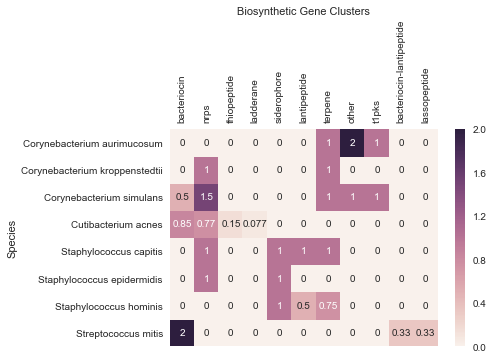

In [140]:
%matplotlib inline
g = sns.heatmap(df4, annot=True, cbar_kws={"orientation":"vertical"})
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.xaxis.set_ticks_position('top')
g.xaxis.set_label_position('top')
g.set_xlabel('Biosynthetic Gene Clusters')

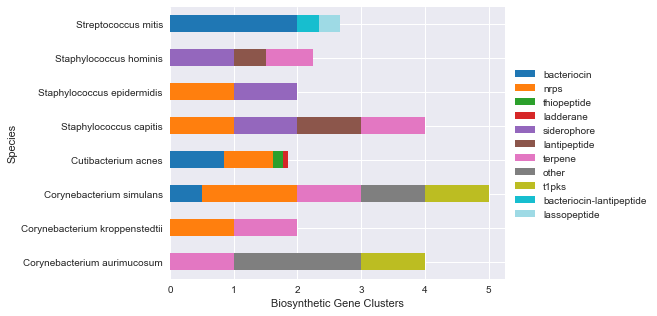

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df4.plot(kind='barh', stacked=True, legend=False, figsize=(10,5), colormap="tab20")
ax.set_xlabel("Biosynthetic Gene Clusters")
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.savefig('BGCs.png', bbox_inches='tight')